In [ ]:
# This program uses a LSTM to predict the closing stock price using the past 60 
# days stock prices

import math 
import pandas_datareader as web 
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

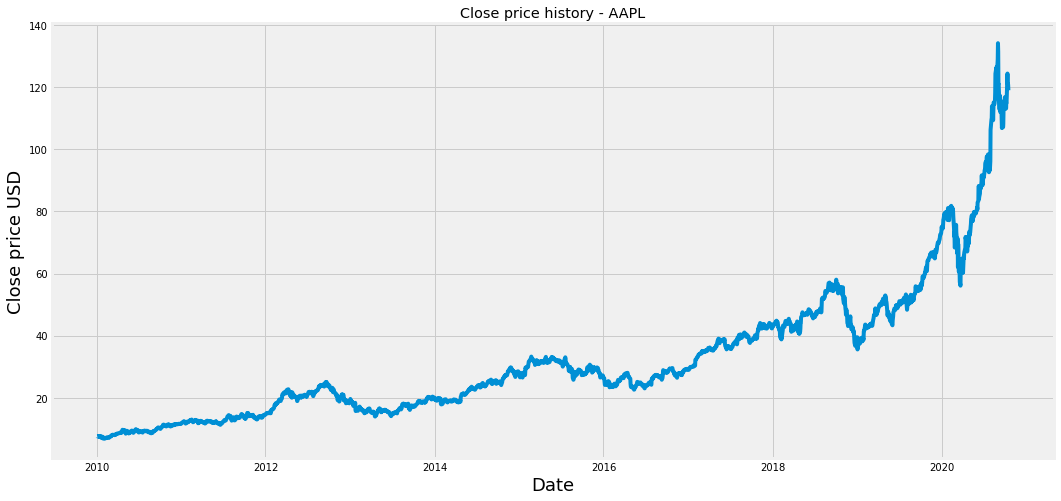

In [ ]:
# get the stock quote
df = web.DataReader('AAPL', 
                    data_source='yahoo', 
                    start='2010-01-01', 
                    end='2020-10-17')

# show the data
#df 

# get the number of rows and columns in the data set
#df.shape

# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history - AAPL')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.show()

In [ ]:
# create a new dataframe with only 'Close' column
data = df.filter(['Close'])
# convert the dataframe into a numpy array 
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
# create the training set 
train_data = scaled_data[0:training_data_len, :]
# split into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

# convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# reshape the data to feed the LSTM 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# print(x_train.shape)

In [ ]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2114/2114 [==============================] - 43s 21ms/step - loss: 1.8629e-04


In [ ]:
# create a testing dataset
test_data = scaled_data[training_data_len-60:, :]
# create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# convert to numpy array
x_test = np.array(x_test) 
# reshape
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
# get the model predicted price values
predictions = model.predict(x_test) 

In [ ]:
# unscale
predictions = scaler.inverse_transform(predictions)

# get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions - y_test)**2)))
# print(rmse)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


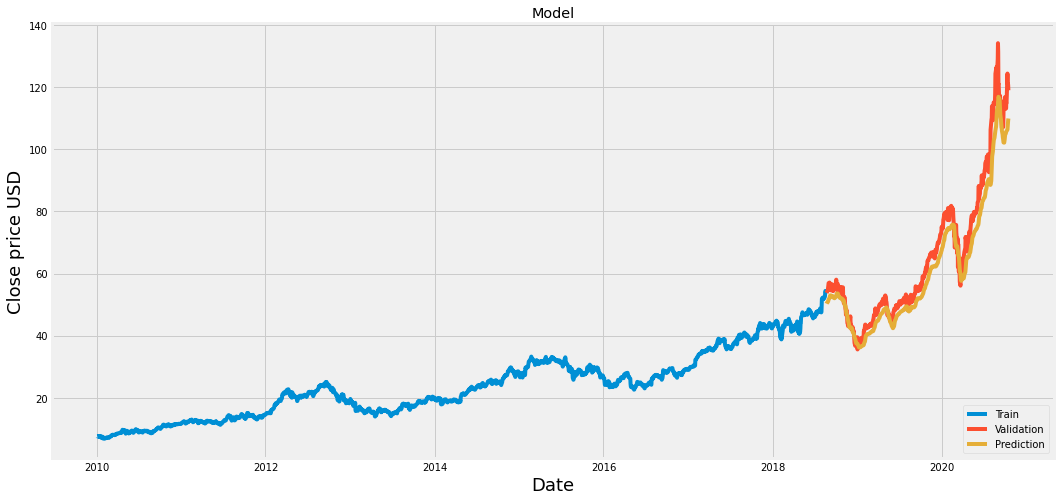

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# visualize the model 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Prediction'], loc='lower right')
plt.show()

In [ ]:
# show valid and predicted prices
valid 

,Close,Predictions
Date,,
2018-08-22,53.762501,50.293098
2018-08-23,53.872501,50.468811
2018-08-24,54.040001,50.610600
2018-08-27,54.485001,50.737324
2018-08-28,54.924999,50.888374
...,...,...
2020-10-12,124.400002,106.332123
2020-10-13,121.099998,107.465446
2020-10-14,121.190002,108.452950


In [ ]:
# predict the price for a specific day
apple_quote = web.DataReader('AAPL', 
                            data_source='yahoo', 
                            start='2010-01-01', 
                            end='2019-12-17')
# create a new dataframe
new_df = apple_quote.filter(['Close'])
# get the last 60 day closing prices values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# scale
last_60_days_scaled = scaler.transform(last_60_days)
# x_test
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# get the prediction
pred_price = model.predict(X_test) 
# unscale 
pred_price = scaler.inverse_transform(pred_price)
print('Predicted price for 2019-12-18:', pred_price)

real_price = web.DataReader('AAPL', 
                            data_source='yahoo', 
                            start='2019-12-18', 
                            end='2019-12-18')
print('Real price for 2019-12-18: \n', real_price['Close'])

Predicted price for 2019-12-18: [[64.28331]]
Real price for 2019-12-18: 
 Date
2019-12-18    69.934998
Name: Close, dtype: float64
